In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(0)

import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '6'
sys.path.insert(0,'..')

import torch

from util import read_data_in_dense_matrix, eval_prediction, store_dense_matrix_to_submission
from baselines import impute_by_ALS_GD

data_dir = '../../data/'

/local/home/yuhmao/miniconda3/envs/SCT/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
(train_matrix, test_matrix), (is_train, is_test) = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=0.2)

In [5]:
rmse_dict = {}
reg = 0.3
for k in [1, 3, 5, 7, 9]:
    prediction, loss_monitor = impute_by_ALS_GD(train_matrix, is_train, num_epoch=1000, iters_per_epoch=20, rank=k, reg_weight=reg)
    rmse = eval_prediction(prediction, test_matrix, is_test)
    rmse_dict[k] = rmse
    print(rmse)


Using: cuda
1.0030318412163828
Using: cuda
0.9952836415343941
Using: cuda
1.0022624221793266
Using: cuda
1.0138160856761036
Using: cuda
1.027884950023726


In [9]:
rmse_dict = {}
k= 3
for reg in [0.3*i for i in range(2, 5)]:
    prediction, loss_monitor = impute_by_ALS_GD(train_matrix, is_train, num_epoch=1000, iters_per_epoch=20, rank=k, reg_weight=reg)
    rmse = eval_prediction(prediction, test_matrix, is_test)
    rmse_dict[k] = rmse
    print(rmse)


Using: cuda
0.9944472541270071
Using: cuda
0.9939252690576822
Using: cuda
0.9939732192560943


Using: cuda


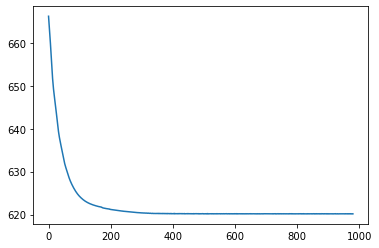

In [11]:
k = 3
reg = 0.9
data_matrix, is_provided = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=None)
prediction, loss_monitor = impute_by_ALS_GD(data_matrix, is_provided, num_epoch=1000, iters_per_epoch=20, rank=k, reg_weight=reg)
plt.plot(loss_monitor[20:])
plt.show()

In [12]:
store_dense_matrix_to_submission(os.path.join(data_dir, 'sampleSubmission.csv'), os.path.join(data_dir, 'mysub.csv'), prediction)

Loading requests specified by submission samples...
Storing 1176952 records for submission as requested...
